背景
弦图以其直观、精美的展示方式受到越来越多人的关注，它不仅能够有效展示两个变量之间的联系，还能同时展现多个变量间的复杂互动，本文将通过Python语言中的pycirclize库，带你深入了解如何绘制弦图，并展示三种不同的数据结构与可视化方式什么是弦图？弦图是一种圆形可视化方法，通常用于展示两组对象之间的相互联系和权重，弧线代表对象，弦代表对象之间的连接，弦的宽度表示关系的强弱，弦图直观地反映了多个对象之间的复杂联系，使其非常适用于社交网络、基因表达、系统架构等领域的数据展示为什么选择 pycirclize？在 Python 中，有多个库可以用于绘制弦图，例如 matplotlib 和 plotly，然而，pycirclize 是一个专门用于生成环形可视化（弦图、同心环图等）的库，它具备以下优点：简单直观的 API：它的接口设计简洁，易于上手，适合快速生成弦图灵活自定义：提供丰富的配置项，能够对图形的各个方面进行调整，包括弧、弦、颜色、标签等高效绘制：即使是比较大的数据集，pycirclize 也能够快速生成精美的图形接下来，我们将通过三种常见的数据表示方式，展示如何使用 pycirclize 库绘制弦图

In [2]:
from pycirclize import Circos
import pandas as pd

#定义行名称与列名称
rows_name = ['S1', 'S2', 'S3']
cols_name = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6']

#定义矩阵数据
matrix_data = [
    [4,14,13,17,5,2],
    [5,12,9,15,3,7],
    [6,8,11,19,1,4]
]

#创建数据框,用于表示矩阵数据，行名称与列名称分别为rows_name与cols_name
matrix_df = pd.DataFrame(matrix_data, index=rows_name, columns=cols_name)
matrix_df

,E1,E2,E3,E4,E5,E6
S1,4,14,13,17,5,2
S2,5,12,9,15,3,7
S3,6,8,11,19,1,4


    E1  E2  E3  E4  E5  E6
S1   4  14  13  17   5   2
S2   5  12   9  15   3   7
S3   6   8  11  19   1   4


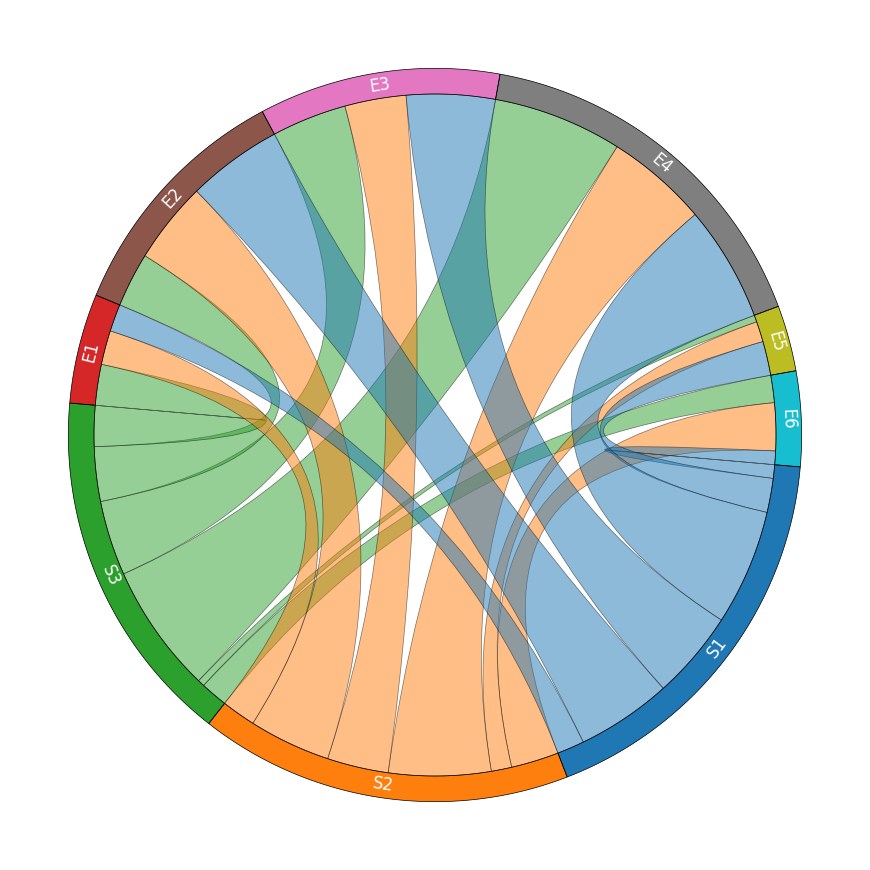

In [5]:
#创建弦图对象
circos = Circos.initialize_from_matrix(
    matrix_df,#矩阵数据
    start=-265,#起始角度
    end=95,#结束角度
    r_lim=(93,100),#环形范围
    cmap='tab10',#颜色映射
    label_kws=dict(
        r=94,#标签半径
        size=12,#标签大小
        color='white'#标签颜色
    ),
    link_kws=dict(
        ec='black',#弦的颜色
        lw=0.5#弦的宽度
    )
)
print(matrix_df)
#绘制弦图
fig=circos.plotfig()
fig.savefig('弦图1.pdf',format='pdf',bbox_inches='tight',dpi=1200)

     E1  E2  E3  E4  E5  E6  E7  E8  E9  E10
S1    2  19  10  10  18  17   3  13  11    9
S2    3  16  16   9  14   8   4  13   3    7
S3   17   5  10  16  18   7   4   1   7    8
S4   10   5   4  11   6   2   5  10  14    9
S5   12   9   8  14  19   5   2   7   8    6
S6    7  12  13   6   6  16   3  17  16   18
S7   10   7   2   3   4  16  13  17  12    7
S8    9   4   9  19   9  12   4  16  12   10
S9    6  18   7  12  17  15  17   5   5   11
S10  15   4  19  19  16  18   9  18  15   14


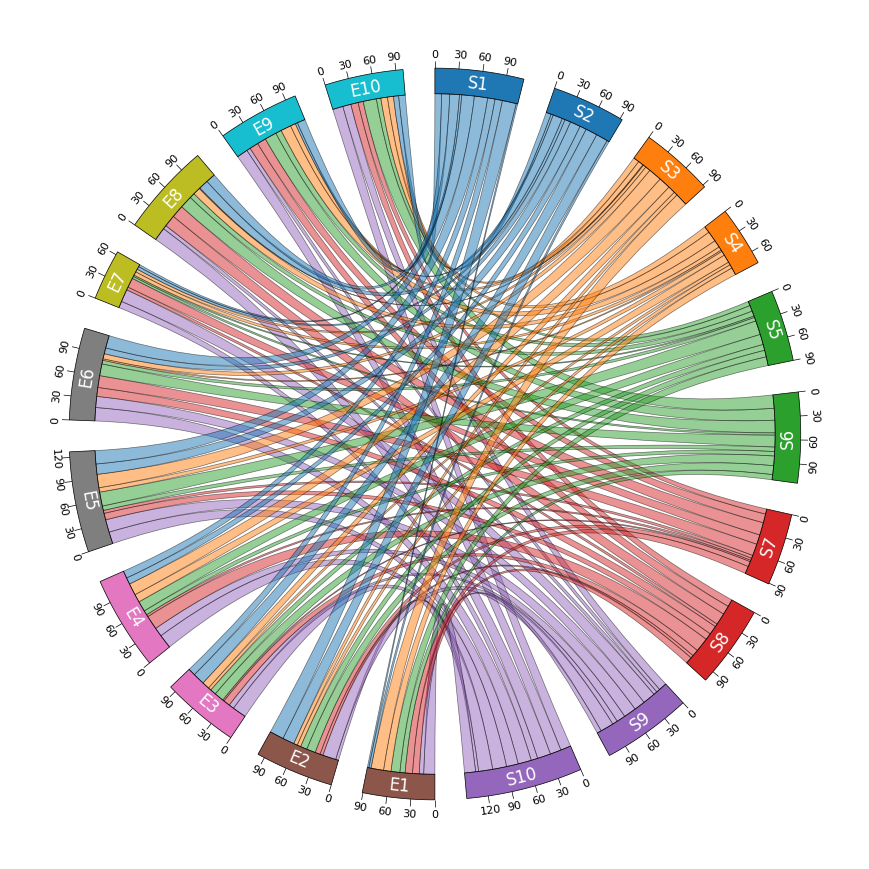

In [6]:
from pycirclize import Circos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 生成一个10x10的随机整数矩阵
row_names = [f"S{i+1}" for i in range(10)]  # 行名称，S1 到 S10
col_names = [f"E{i+1}" for i in range(10)]  # 列名称，E1 到 E10
matrix_data = np.random.randint(1, 20, size=(10, 10))  # 生成随机1到20之间的整数
# 将矩阵数据转换为 DataFrame，以方便后续操作
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)
# 初始化 Circos 图
circos = Circos.initialize_from_matrix(    matrix_df,             # 传入矩阵数据    
                            space=5,               # 每个单元之间的间隔设为5度    
                            r_lim=(93, 100),       # 设置圆形图的半径范围为93到100    
                            cmap='tab10',          # 使用颜色映射方案 'tab10'，可以生成多种颜色    
                            ticks_interval=30,     # 设置刻度间隔，每隔20个单位标记一个刻度    
                            label_kws=dict(        
                                        r=94,              # 标签的半径距离为94        
                                        size=12,           # 标签的字体大小设为12        
                                        color='white'      # 标签的字体颜色为白色    
                            ),    
                            link_kws=dict(        
                                        ec='black',        # 弦的边框颜色为黑色        
                                        lw=0.5             # 弦的线宽设为0.5    
                            )
                        )
# 绘制 Circos 图
fig = circos.plotfig()
print(matrix_df)
fig.savefig("弦图2.pdf", format='pdf', bbox_inches='tight', dpi=1200)

from to  value
   A  B     10
   A  C      5
   A  D     15
   A  E     20
   A  F      3
   B  A      3
   B  G     15
   F  D     13
   F  E     13
   E  A     20
   E  D      6


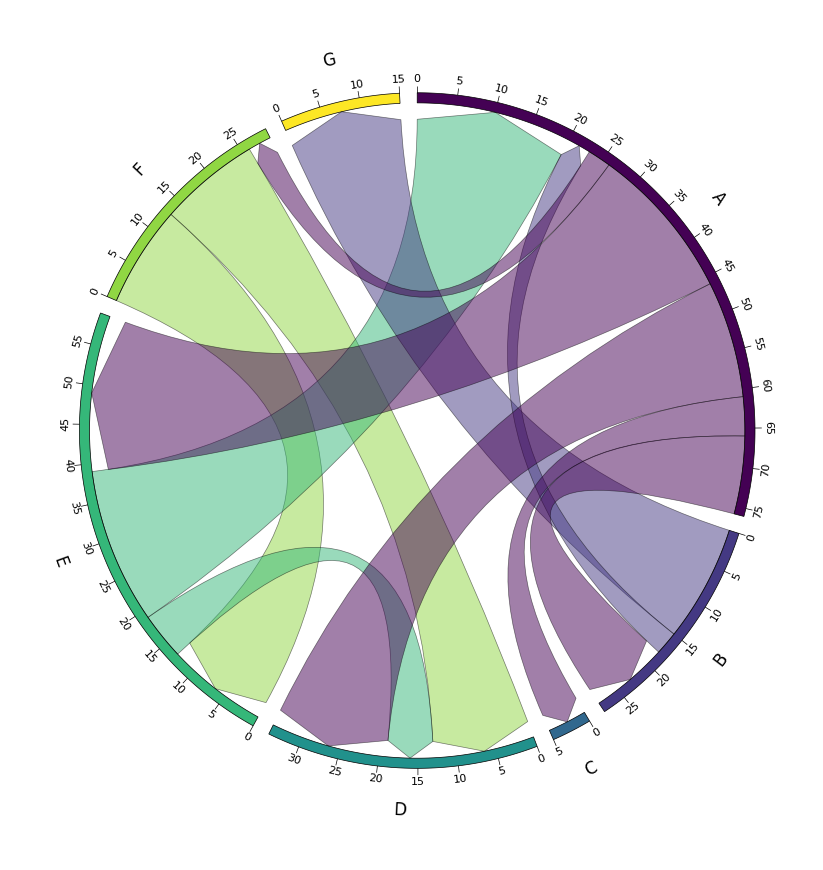

In [7]:
from pycirclize.parser import Matrix
import pandas as pd
from pycirclize import Circos
# 创建一个包含 'from'、'to' 和 'value' 列的 DataFrame# 该表表示从某个节点到另一个节点的联系及其权重
fromto_table_df = pd.DataFrame([ 
                        ["A", "B", 10],  # A到B的权重为10    
                        ["A", "C", 5],   # A到C的权重为5    
                        ["A", "D", 15],  # A到D的权重为15    
                        ["A", "E", 20],  # A到E的权重为20    
                        ["A", "F", 3],   # A到F的权重为3    
                        ["B", "A", 3],   # B到A的权重为3    
                        ["B", "G", 15],  # B到G的权重为15    
                        ["F", "D", 13],  # F到D的权重为13    
                        ["F", "E", 13],  # F到E的权重为13    
                        ["E", "A", 20],  # E到A的权重为20    
                        ["E", "D", 6]    # E到D的权重为6
                      ], 
                        columns=["from", "to", "value"])  # 设置列名为 'from'，'to'，'value'
# 使用 Matrix 类的 parse_fromto_table 方法将 'from-to' 表解析为矩阵
matrix = Matrix.parse_fromto_table(fromto_table_df)
# 使用解析后的矩阵初始化 Circos 图
circos = Circos.initialize_from_matrix( matrix,              # 传入解析后的矩阵    
                                         space=3,             # 每个单元之间的间隔设置为3度    
                                         cmap="viridis",      # 使用 'viridis' 颜色映射表    
                                         ticks_interval=5,    # 设置刻度间隔为5    
                                         label_kws=dict(      # 设置标签的关键字参数        
                                         size=12,         # 标签字体大小为12       
                                         r=110            # 标签距离圆心的半径为110    
                                         ),    
                                link_kws=dict(       # 设置弦的样式        
                                         direction=1,     # 设定弦的方向        
                                         ec="black",      # 弦的边框颜色为黑色       
                                         lw=0.5           # 弦的线宽设置为0.5    
                                )
)
# 打印 from-to 表的内容，方便调试或查看
print(fromto_table_df.to_string(index=False))# 绘制 Circos 图
fig = circos.plotfig()
fig.savefig("弦图3.pdf", format='pdf', bbox_inches='tight', dpi=1200)